In [30]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

In [ ]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#lets check the null records
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [18]:
#lets check the distribution of the categorical data
df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [16]:
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [20]:
#Encoding categorical to numerical
df = df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}, 'Transmission':{'Manual':0, 'Automatic':1}, 'Seller_Type':{'Dealer':0, 'Individual':1}})
df.head()

/tmp/ipython-input-20-3948681203.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}, 'Transmission':{'Manual':0, 'Automatic':1}, 'Seller_Type':{'Dealer':0, 'Individual':1}})


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [21]:
#split the data
x = df.drop(columns = ['Car_Name', 'Selling_Price'])
y = df['Selling_Price']
print(x.shape, y.shape)

(301, 7) (301,)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)
print(x_train.shape, x_test.shape, y_trian.shape, y_test.shape)

(270, 7) (31, 7) (240,) (31,)


In [47]:
#model
model = LinearRegression()
model.fit(x_train, y_train)
model

LinearRegression()

In [48]:
y_train_pred = model.predict(x_train)
print(sklearn.metrics.r2_score(y_train_pred, y_train))

0.8635655509198777


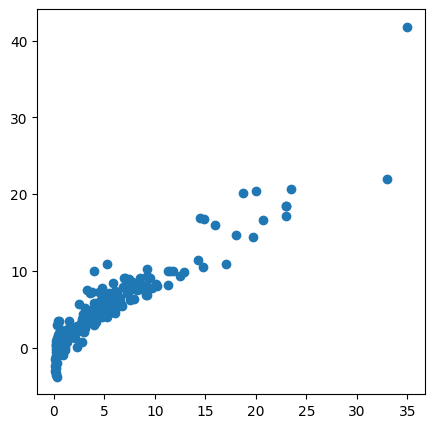

In [49]:
#lets see how close is the prediction
plt.figure(figsize = (5,5))
plt.scatter(y_train, y_train_pred)

In [50]:
from sklearn.metrics import r2_score
y_test_pred = model.predict(x_test)
r2_score(y_test_pred, y_test)

0.8062199941176358

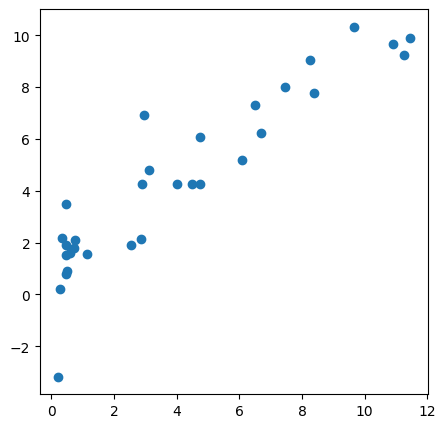

In [51]:
#lets see how close is the prediction
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_test_pred)

In [ ]:
#now lets see the same in Lasso


In [35]:
#model- Lasso
model = Lasso()
model.fit(x_train, y_train)
model

Lasso()

In [40]:
y_train_pred = model.predict(x_train)
print(sklearn.metrics.r2_score(x_train_pred, y_train))

0.7999397993548054


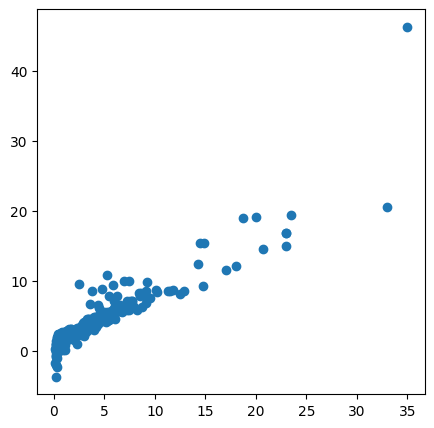

In [41]:
#lets see how close is the prediction
plt.figure(figsize = (5,5))
plt.scatter(y_train, y_train_pred)

In [37]:
from sklearn.metrics import r2_score
y_test_pred = model.predict(x_test)
r2_score(y_test_pred, y_test)

0.7717678246278714

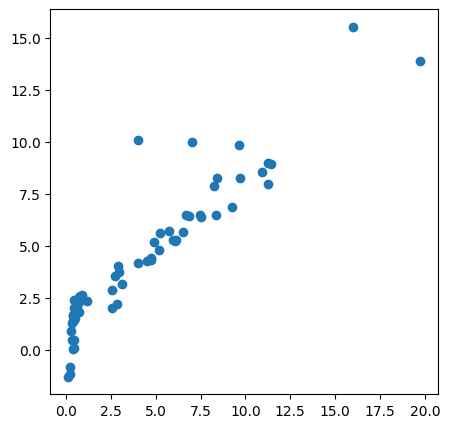

In [39]:
#lets see how close is the prediction
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_test_pred)